In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('ex1data2.txt', names = ["Size",'Rooms',"Price"])
df.head()

,Size,Rooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [39]:
m = len(df['Price'])
n = df.shape[1]

X = df.iloc[:,:2]
y = df.iloc[:,2]
y = y[:,np.newaxis]
mu = X.mean()
sigma = X.std()
X = (X - mu)/sigma
X = np.append(np.ones((m,1)), X, axis = 1)
Theta = np.zeros((3,1))

In [40]:
def cost_function(X, y, Theta):
    h_theta = np.dot(X,Theta)
    j_theta = (1/(2*m)) * np.sum((h_theta - y) ** 2)
    return j_theta
cost_function(X, y, Theta)

65591548106.45744

In [41]:
def gradient_descent(X, y, Theta, alpha, iterations):
    cost = []
    for i in range(iterations):
        h_theta = np.dot(X,Theta)
        j_val = np.dot(X.T, (h_theta - y))
        Theta = Theta - ((alpha/m) * j_val)
        cost.append(cost_function(X, y, Theta))
    return Theta ,cost
Theta ,cost = gradient_descent(X, y, Theta, 0.01, 400)

In [42]:
Theta

array([[334302.06399328],
       [100087.11600585],
       [  3673.54845093]])

Text(0.5,1,'Convergence Test')

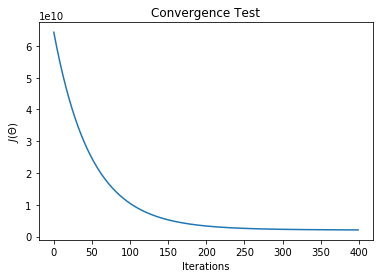

In [47]:
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Convergence Test')

In [43]:
def predict(X):
    predict = np.dot(X.T,Theta)
    return predict

In [44]:
values = np.array([1, 1650, 3])
values = values.reshape(3,1)
values[1,0] = (values[1,0] - mu[0]) / (sigma[0])
values[2,0] = (values[2,0] - mu[1]) / (sigma[1])
predict(values)

array([[334302.06399328]])